In [1]:
import numpy as np
import tensorflow as tf
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from google.colab import drive
import glob
import os
from keras.callbacks import EarlyStopping


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset_dir = '/content/drive/MyDrive/Dataset_IC01/Gigi Tampak Atas '

In [6]:
class_labels = ['Gigi Sehat (Nodup)', 'Gigi Berlubang (Nodup)', 'Bengkak Gusi', 'Plak Gigi']

In [7]:
import os
files = os.listdir(dataset_dir)
print(files)

['Gigi Sehat (Nodup)', 'Gigi Berlubang (Nodup)', 'Bengkak Gusi', 'Plak Gigi']


In [8]:
# Initialize an empty list to store the image files
image_files = []

# Iterate over the subdirectories
for subdir in os.listdir(dataset_dir):
    subdir_path = os.path.join(dataset_dir, subdir)
    for file in os.listdir(subdir_path):
        if file.endswith(('.jpg', '.jpeg', '.png')):
            image_files.append(os.path.join(subdir_path, file))

# Split the image files into training and testing sets
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    classes=class_labels
)

test_generator = test_datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    classes=class_labels
)

Found 1750 images belonging to 4 classes.
Found 1750 images belonging to 4 classes.


In [14]:
# Define the CNN model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4, activation='softmax')
])


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

In [16]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [17]:
# Membuat EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.01)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=100,  # Anda bisa mengatur jumlah epoch sesuai kebutuhan
    validation_data=test_generator,
    validation_steps=test_generator.samples // 32,
    callbacks=[early_stopping]
)

Epoch 1/100
54/54 [==============================] - ETA: 0s - loss: 1.2505 - accuracy: 0.5082

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


54/54 [==============================] - 424s 8s/step - loss: 1.2505 - accuracy: 0.5082 - val_loss: 0.8651 - val_accuracy: 0.7211
Epoch 2/100
54/54 [==============================] - 191s 4s/step - loss: 0.8607 - accuracy: 0.6874 - val_loss: 0.7631 - val_accuracy: 0.7361
Epoch 3/100
54/54 [==============================] - 204s 4s/step - loss: 0.7546 - accuracy: 0.7442 - val_loss: 0.6993 - val_accuracy: 0.7569
Epoch 4/100
54/54 [==============================] - 160s 3s/step - loss: 0.6249 - accuracy: 0.7940 - val_loss: 0.5557 - val_accuracy: 0.8009
Epoch 5/100
54/54 [==============================] - 144s 3s/step - loss: 0.6253 - accuracy: 0.7869 - val_loss: 0.4986 - val_accuracy: 0.8322
Epoch 6/100
54/54 [==============================] - 147s 3s/step - loss: 0.5191 - accuracy: 0.8208 - val_loss: 0.4217 - val_accuracy: 0.8600
Epoch 7/100
54/54 [==============================] - 160s 3s/step - loss: 0.4821 - accuracy: 0.8279 - val_loss: 0.3827 - val_accuracy: 0.8681
Epoch 8/100
54/54 

In [18]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2f}')

110/110 [==============================] - 69s 626ms/step - loss: 0.0732 - accuracy: 0.9857
Test accuracy: 0.99


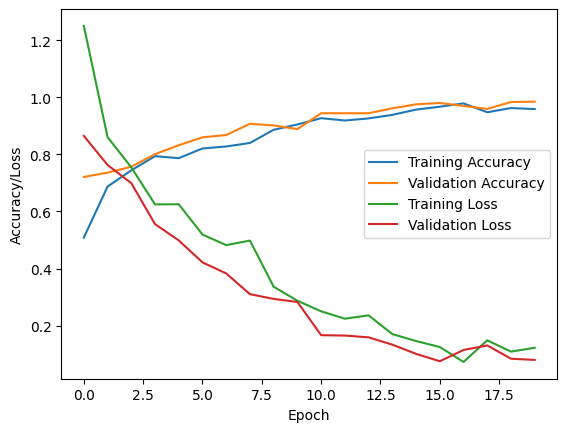

In [19]:
import matplotlib.pyplot as plt

# Plot the training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Accuracy/Loss')
plt.legend()
plt.show()

In [21]:
# Save the model
model.save('tampak_Atas.h5')

In [22]:
import numpy as np
from PIL import Image

In [26]:
test_image= '/content/gigi4.jpeg'

In [27]:
img = Image.open(test_image)
img = img.resize((224, 224))  # Resize the image to 224x224
img = np.array(img) / 255.0  # Normalize the image pixels to [0, 1]

In [28]:
# Add a batch dimension to the image
img = np.expand_dims(img, axis=0)

# Make predictions on the image
predictions = model.predict(img)

# Get the class probabilities
class_probabilities = predictions[0]

1/1 [==============================] - 0s 191ms/step


In [29]:
predictions

array([[2.7933291e-07, 6.6782660e-12, 4.6017934e-17, 9.9999976e-01]],
      dtype=float32)

In [30]:
# Get the class with the highest probability
class_index = np.argmax(class_probabilities)
class_name = ['Bengkak Gusi', 'Bukan Gambar Gigi', 'Gigi Sehat','Gigi Berlubang','Plak Gigi'][class_index]

print(f'Predicted class: {class_name}')
print(f'Class probability: {class_probabilities[class_index]:.2f}')

Predicted class: Gigi Berlubang
Class probability: 1.00


In [ ]:
class_probabilities